<a href="https://colab.research.google.com/github/shari111/Machine-Learning/blob/main/datapreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

from sklearn.metrics import accuracy_score,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,FunctionTransformer,PowerTransformer, KBinsDiscretizer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer

In [ ]:
df = sns.load_dataset('titanic')

# Understanding Your Data

How big is data

In [ ]:
df.shape

(891, 15)

How does data look like

In [ ]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [ ]:
df.sample(4)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
772,0,2,female,57.0,0,0,10.5000,S,Second,woman,False,E,Southampton,no,True
344,0,2,male,36.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
192,1,3,female,19.0,1,0,7.8542,S,Third,woman,False,NaN,Southampton,yes,False
752,0,3,male,33.0,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True


What is datatype of columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Are there any missing values

In [ ]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

How does data look mathematically

In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Are there any duplicate values

In [ ]:
df.duplicated().sum()

107

In [ ]:
df.drop_duplicates(inplace = True)

How is correlation between columns

In [ ]:
df.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.332658,-0.086548,-0.036589,0.070307,0.246769,-0.528502,-0.176595
pclass,-0.332658,1.000000,-0.369361,0.088014,0.040296,-0.549216,0.066816,0.109545
age,-0.086548,-0.369361,1.000000,-0.315116,-0.195036,0.092707,0.296095,0.210047
sibsp,-0.036589,0.088014,-0.315116,1.000000,0.381433,0.135147,-0.274521,-0.609502
parch,0.070307,0.040296,-0.195036,0.381433,1.000000,0.191942,-0.347186,-0.571087
fare,0.246769,-0.549216,0.092707,0.135147,0.191942,1.000000,-0.165209,-0.246619
adult_male,-0.528502,0.066816,0.296095,-0.274521,-0.347186,-0.165209,1.000000,0.387850
alone,-0.176595,0.109545,0.210047,-0.609502,-0.571087,-0.246619,0.387850,1.000000


# EDA

# Univariate Analysis
Analysis of one column

Categorical data

1. Count plot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    461
1    323
Name: survived, dtype: int64

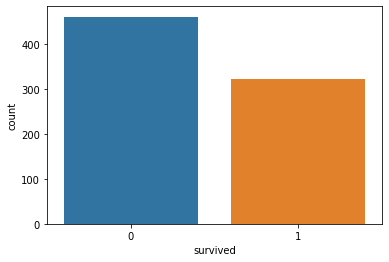

In [ ]:
sns.countplot(df['survived'])
df['survived'].value_counts()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


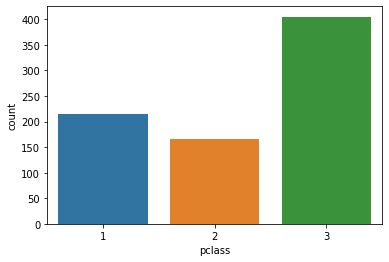

In [ ]:
sns.countplot(df['pclass'])

2. Piechart

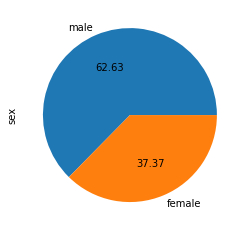

In [ ]:
df['sex'].value_counts().plot(kind = 'pie', autopct = '%.2f')

Numerical Data

1. Histogram

(array([29., 17., 15.,  9., 29., 59., 61., 64., 77., 57., 47., 40., 34.,
        26., 35., 22., 15.,  9., 11., 11.,  4.,  2.,  3.,  1.,  1.]),
 array([ 0.42  ,  3.6032,  6.7864,  9.9696, 13.1528, 16.336 , 19.5192,
        22.7024, 25.8856, 29.0688, 32.252 , 35.4352, 38.6184, 41.8016,
        44.9848, 48.168 , 51.3512, 54.5344, 57.7176, 60.9008, 64.084 ,
        67.2672, 70.4504, 73.6336, 76.8168, 80.    ]),
 <a list of 25 Patch objects>)

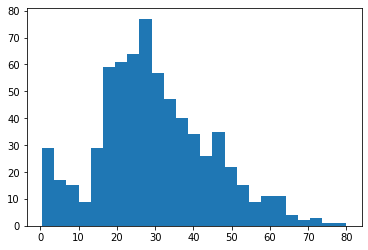

In [ ]:
plt.hist(df['age'],bins = 25)

2. Distplot

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


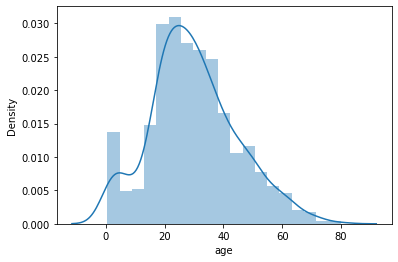

In [ ]:
sns.distplot(df['age'])

3. Boxplot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


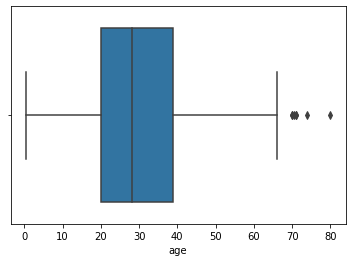

In [ ]:
sns.boxplot(df['age'])

4. Kdeplot

In [ ]:
sns.kdeplot(df['age'])

In [ ]:
df['age'].mean()

29.869351032448375

In [ ]:
df['age'].min()

0.42

In [ ]:
df['age'].max()

80.0

In [ ]:
df['age'].skew()

0.3674542095476674

# Bivariate Analysis / Multivariate Analysis
Analysis of two columns at a time/ Analysis of more than two columns at a time

In [ ]:
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
iris= sns.load_dataset('iris')

1. Scatter plot -> Numerical, Numerical

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


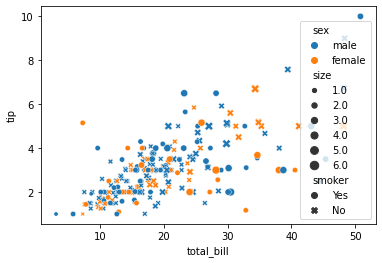

In [ ]:
sns.scatterplot(tips['total_bill'],tips['tip'],hue = df['sex'],style = tips['smoker'],size = tips['size'])

2. Bar plot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


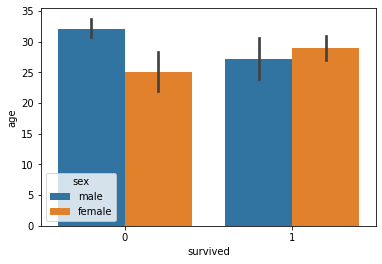

In [ ]:
sns.barplot(df['survived'],df['age'],hue = df['sex'])

3. Boxplot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


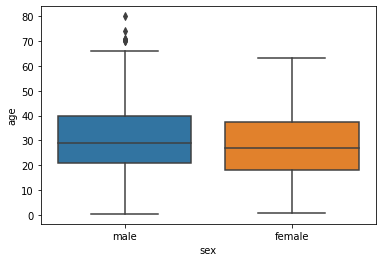

In [ ]:
sns.boxplot(df['sex'],df['age'])

4. Distplot -> Numerical, categorical

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


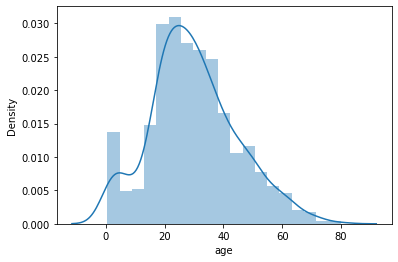

In [ ]:
sns.distplot(df['age'])

In [ ]:
sns.distplot(df[df['survived']==0]['age'],hist=False)
sns.distplot(df[df['survived']==1]['age'],hist=False)

5. Heatmap -> Categorical, Categorical

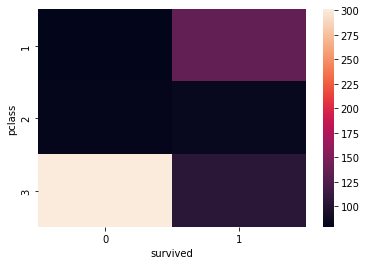

In [ ]:
sns.heatmap(pd.crosstab(df['pclass'],df['survived']))

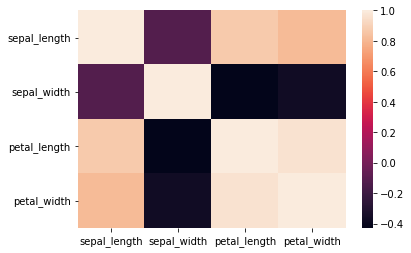

In [ ]:
sns.heatmap(iris.corr())

In [ ]:
(df.groupby('embarked').mean()['survived']*100)

embarked
C    58.064516
Q    33.898305
S    37.147887
Name: survived, dtype: float64

6. Cluster map -> categorical, categorical

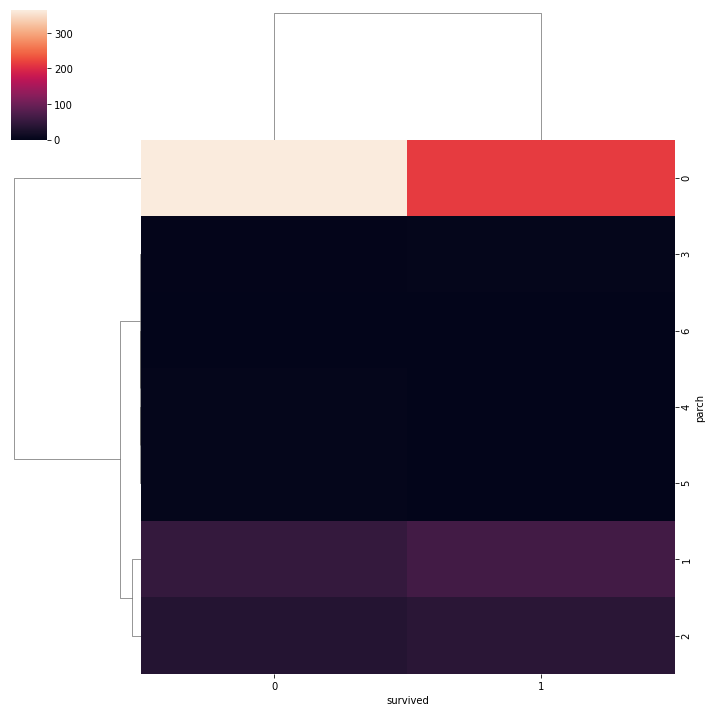

In [ ]:
sns.clustermap(pd.crosstab(df['parch'],df['survived']))

7. Pairplot

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


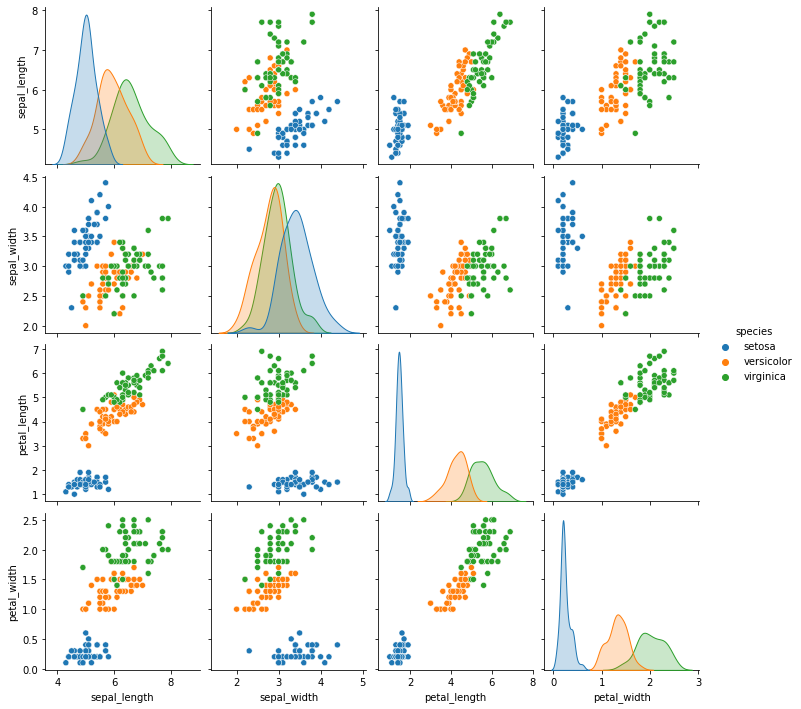

In [ ]:
sns.pairplot(iris,hue='species')

8. Lineplot -> Numerical, numerical

In [ ]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
new = flights.groupby('year').sum().reset_index()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


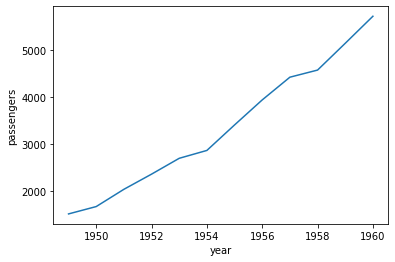

In [ ]:
sns.lineplot(new['year'],new['passengers'])

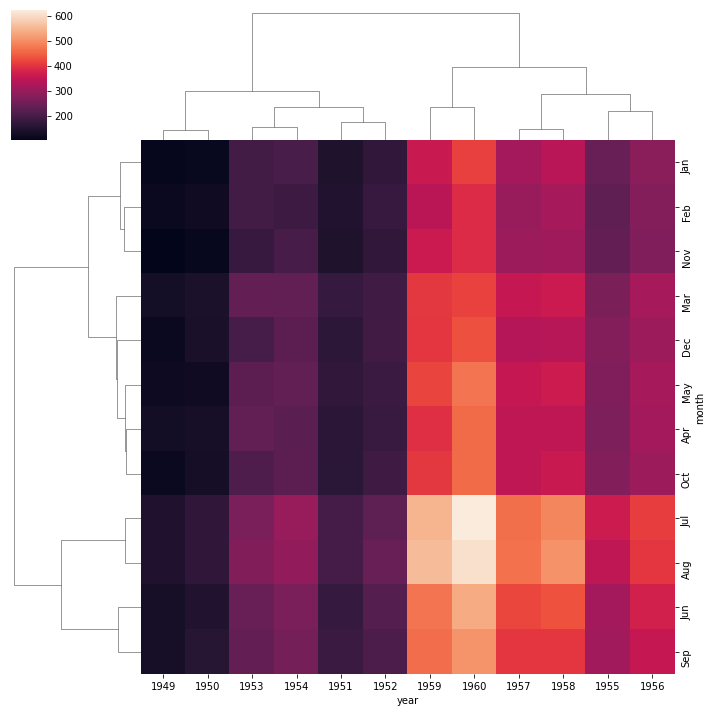

In [ ]:
sns.clustermap(flights.pivot_table(values='passengers',index='month',columns='year'))

# Pandas Profiling

In [ ]:
!pip install ydata-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from ydata_profiling import ProfileReport
prof = ProfileReport(df)

In [ ]:
prof.to_file(output_file = '/content/output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

# Feature Engineering

A. Feature Transformation


*   Missing Value Imputation
*   Handling categorical features
* Outlier detection
* Feature Scaling



B. Feature Construction

C. Feature Selection

D. Feature Extraction

# Feature Scaling

**NOTE:** Fit on train data, and transform train and test data

**Standardization (Z score normalization)**

When to use standardization
- K-means
- KNN
- PCA
- ANN
- Gradient Descent

When to not use
- Classifier trees

In [ ]:
import random
df2 = pd.DataFrame()
age = []
salary = []
for i in range(500):
  age.append(random.randint(21,100))
  salary.append(random.randint(20000, 100000))
df2['Age'] = age
df2['Salary'] = salary

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df2)

df2_scaled = scaler.transform(df2)

In [ ]:
df2_scaled.shape

(500, 2)

In [ ]:
scaler.mean_

array([6.0486000e+01, 6.0599116e+04])

In [ ]:
df2_scaled = pd.DataFrame(df2_scaled, columns = df2.columns)

In [ ]:
df2_scaled

,Age,Salary
0,-0.998595,-1.667587
1,-1.296226,-1.485526
2,-0.700964,-1.592294
3,-1.423782,-0.372213
4,-0.275776,0.233958
...,...,...
495,-1.636375,1.201888
496,-1.636375,-1.132410
497,1.042304,1.526409
498,-1.253707,0.980266


In [ ]:
np.round(df2.describe(),1)

,Age,Salary
count,500.0,500.0
mean,60.5,60599.1
std,23.5,23279.1
min,21.0,20023.0
25%,40.0,40289.2
50%,60.0,60835.0
75%,81.0,81116.8
max,100.0,99856.0


In [ ]:
np.round(df2_scaled.describe(),1)

,Age,Salary
count,500.0,500.0
mean,0.0,-0.0
std,1.0,1.0
min,-1.7,-1.7
25%,-0.9,-0.9
50%,-0.0,0.0
75%,0.9,0.9
max,1.7,1.7


**Normalization**
- Min max Scaling
- Mean normalization
- max absolute
- Robust scaling

A. Min Max scaling

In [ ]:
wine_data = pd.read_csv('/content/wine_data.csv', header=None,usecols=[0,1,13])
wine_data.columns = ['Alcohol','Malic acid','class label']
wine_data.head()

,Alcohol,Malic acid,class label
0,14.23,1.71,0
1,13.20,1.78,0
2,13.16,2.36,0
3,14.37,1.95,0
4,13.24,2.59,0


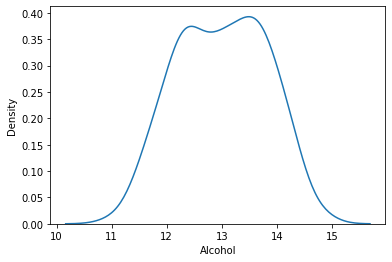

In [ ]:
sns.kdeplot(wine_data['Alcohol'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


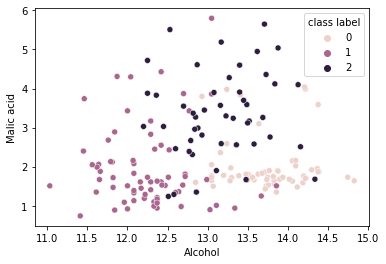

In [ ]:
sns.scatterplot(wine_data['Alcohol'],wine_data['Malic acid'],hue = wine_data['class label'])

In [ ]:
X = wine_data[['Alcohol','Malic acid']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

In [ ]:
X_scaled.head()

,Alcohol,Malic acid
0,0.842105,0.191700
1,0.571053,0.205534
2,0.560526,0.320158
3,0.878947,0.239130
4,0.581579,0.365613


**Normalization Vs Standardization**

Most problem are solved with Standardization

In CNN we use normalization(Min Max Scaling)

When Outliers are present we use Robust Scaling

# Handling categorical values

**Ordinal Encoding**

In [ ]:
cus = pd.read_csv('/content/customer.csv')
cus = cus.iloc[:,2:]
cus.head()

,review,education,purchased
0,Average,School,No
1,Poor,UG,No
2,Good,PG,No
3,Good,PG,No
4,Average,UG,No


In [ ]:
X_cus = cus[['review','education']]

In [ ]:
X_cus.review.unique()

array(['Average', 'Poor', 'Good'], dtype=object)

In [ ]:
X_cus.education.unique()

array(['School', 'UG', 'PG'], dtype=object)

In [ ]:
X_cus.rename(columns={'education':'edu qualification'},inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
X_cus.edu qualification.unique()

SyntaxError: ignored

In [ ]:
X_cus.rename(columns={'edu qualification':'edu_qualification'},inplace = True)

In [ ]:
X_cus.edu_qualification.unique()

array(['School', 'UG', 'PG'], dtype=object)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
oe = OrdinalEncoder(categories=[['Average', 'Poor', 'Good'],['School', 'UG', 'PG']])
oe.fit(X_cus)

OrdinalEncoder(categories=[['Average', 'Poor', 'Good'], ['School', 'UG', 'PG']])

In [ ]:
X_cus = oe.transform(X_cus)

In [ ]:
X_cus = pd.DataFrame(X_cus,columns = ['Age','Education'])

In [ ]:
X_cus.rename(columns={'Age':'Review'},inplace=True)

In [ ]:
X_cus.head(2)

,Review,Education
0,0.0,0.0
1,1.0,1.0


**Label Encoding**

Apply on target variable(output class)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
y = cus['purchased']

In [ ]:
le.fit(y)
y = le.transform(y)

In [ ]:
y

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0])

In [ ]:
y = pd.DataFrame(y,columns = ['purchased'])
y.head(2)

,purchased
0,0
1,0


**One Hot Encoding**

In [ ]:
cars = pd.read_csv('/content/USA_cars_datasets.csv')
cars.head(2)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left


In [ ]:
cars['brand'].value_counts()

In [ ]:
cars['brand'].nunique()

28

In [ ]:
cars['state'].nunique()

44

In [ ]:
cars['title_status'].nunique()

2

Using pandas

In [ ]:
pd.get_dummies(cars,columns=['brand','title_status'],drop_first=True)

,Unnamed: 0,price,model,year,mileage,color,vin,lot,state,country,...,brand_lexus,brand_lincoln,brand_maserati,brand_mazda,brand_mercedes-benz,brand_nissan,brand_peterbilt,brand_ram,brand_toyota,title_status_salvage insurance
0,0,6300,cruiser,2008,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,...,0,0,0,0,0,0,0,0,1,0
1,1,2899,se,2011,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,...,0,0,0,0,0,0,0,0,0,0
2,2,5350,mpv,2018,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,...,0,0,0,0,0,0,0,0,0,0
3,3,25000,door,2014,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,...,0,0,0,0,0,0,0,0,0,0
4,4,27700,1500,2018,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2494,7800,versa,2019,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,...,0,0,0,0,0,1,0,0,0,0
2495,2495,9200,versa,2018,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,...,0,0,0,0,0,1,0,0,0,0
2496,2496,9200,versa,2018,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,...,0,0,0,0,0,1,0,0,0,0
2497,2497,9200,versa,2018,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,...,0,0,0,0,0,1,0,0,0,0


Using Sklearn

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop = 'first',sparse=False,dtype = np.int32)
ohed = ohe.fit_transform(cars[['brand']])
ohed

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

OHE with categories having lot of values

In [ ]:
counts = cars['brand'].value_counts()

In [ ]:
counts

ford               1235
dodge               432
nissan              312
chevrolet           297
gmc                  42
jeep                 30
chrysler             18
bmw                  17
hyundai              15
kia                  13
buick                13
infiniti             12
honda                12
cadillac             10
mercedes-benz        10
heartland             5
land                  4
peterbilt             4
audi                  4
acura                 3
lincoln               2
lexus                 2
mazda                 2
maserati              1
toyota                1
harley-davidson       1
jaguar                1
ram                   1
Name: brand, dtype: int64

In [ ]:
cars['brand'].nunique()
threshold = 10

In [ ]:
repl = counts[counts <= threshold].index

In [ ]:
pd.get_dummies(cars['brand'].replace(repl,'uncommon'))

,bmw,buick,chevrolet,chrysler,dodge,ford,gmc,honda,hyundai,infiniti,jeep,kia,nissan,uncommon
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2495,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2496,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2497,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# Column Transformers

In [ ]:
covid = pd.read_csv('/content/covid.csv')
covid.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [ ]:
X_covid = covid.iloc[:,:5]
X_covid.head(2)

,age,gender,fever,cough,city
0,60,Male,103.0,Mild,Kolkata
1,27,Male,100.0,Mild,Delhi


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [ ]:
transformer = ColumnTransformer(transformers=[
    ('t1',SimpleImputer(),['fever']),
    ('t2',OrdinalEncoder(categories=[['Mild','Strong']]),['cough']),
    ('t3',OneHotEncoder(drop='first',sparse=False),['gender','city'])
],remainder='passthrough')

In [ ]:
transformer.fit_transform(X_covid)

# Sklearn Pipeline

In [ ]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [ ]:
df['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [ ]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
df.drop(labels=['survived','pclass','sex','embark_town','sibsp','parch','adult_male','deck'],axis=1,inplace=True)

In [ ]:
df.head(2)

,age,fare,embarked,class,who,alive,alone
0,22.0,7.2500,S,Third,man,no,False
1,38.0,71.2833,C,First,woman,yes,False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split((df.drop(labels=['alive'],axis=1)),
                                                    df['alive'],
                                                    test_size = 0.2,
                                                    random_state = 42)

In [ ]:
print(df.shape, X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(891, 7) (712, 6) (179, 6) (712,) (179,)


In [ ]:
X_train.head(2)

,age,fare,embarked,class,who,alone
331,45.5,28.5,S,First,man,True
733,23.0,13.0,S,Second,man,True


In [ ]:
t1 = ColumnTransformer(transformers=[
    ('age_imputer',SimpleImputer(),[0]),
    ('embark_imputer',SimpleImputer(strategy='most_frequent'),[2])
],remainder = 'passthrough')

In [ ]:
x1 = t1.fit_transform(X_train)
x1

array([[45.5, 'S', 28.5, 'First', 'man', True],
       [23.0, 'S', 13.0, 'Second', 'man', True],
       [32.0, 'S', 7.925, 'Third', 'man', True],
       ...,
       [41.0, 'S', 14.1083, 'Third', 'man', False],
       [14.0, 'S', 120.0, 'First', 'child', False],
       [21.0, 'S', 77.2875, 'First', 'man', False]], dtype=object)

In [ ]:
t2 = ColumnTransformer(transformers=[
    ('alone_encoding',OrdinalEncoder(categories=[[False,True]]),[5])
],remainder = 'passthrough')

In [ ]:
x2 = t2.fit_transform(x1)
x2

array([[1.0, 45.5, 'S', 28.5, 'First', 'man'],
       [1.0, 23.0, 'S', 13.0, 'Second', 'man'],
       [1.0, 32.0, 'S', 7.925, 'Third', 'man'],
       ...,
       [0.0, 41.0, 'S', 14.1083, 'Third', 'man'],
       [0.0, 14.0, 'S', 120.0, 'First', 'child'],
       [0.0, 21.0, 'S', 77.2875, 'First', 'man']], dtype=object)

In [ ]:
t3 = ColumnTransformer(transformers=[
    ('embark_ohe',OneHotEncoder(drop='first',sparse = False,handle_unknown='ignore'),[2,4,5])
],remainder = 'passthrough')

In [ ]:
x3 = t3.fit_transform(x2)
x3

array([[0.0, 1.0, 0.0, ..., 1.0, 45.5, 28.5],
       [0.0, 1.0, 1.0, ..., 1.0, 23.0, 13.0],
       [0.0, 1.0, 0.0, ..., 1.0, 32.0, 7.925],
       ...,
       [0.0, 1.0, 0.0, ..., 0.0, 41.0, 14.1083],
       [0.0, 1.0, 0.0, ..., 0.0, 14.0, 120.0],
       [0.0, 1.0, 0.0, ..., 0.0, 21.0, 77.2875]], dtype=object)

In [ ]:
x3.shape

(712, 9)

In [ ]:
x3[[0]]

array([[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 45.5, 28.5]], dtype=object)

In [ ]:
t4 = ColumnTransformer(transformers=[
    ('scale',MinMaxScaler(),slice(0,9))
])

In [ ]:
t5 = SelectKBest(score_func=chi2,k=7)

In [ ]:
t6 = DecisionTreeClassifier()

**Create Pipeline**

In [ ]:
pipe = make_pipeline(t1,t2,t3,t4,t6)

In [ ]:
from sklearn import set_config
set_config(display='diagram')

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age_imputer',
                                                  SimpleImputer(), [0]),
                                                 ('embark_imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [2])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('alone_encoding',
                                                  OrdinalEncoder(categories=[[False,
                                                                              True]]),
                                                  [5])])),
                ('columntransformer-3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('embark_ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [3, 4, 5])])),
                ('columntransformer-4',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 9, None))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [ ]:
y_pred = pipe.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5865921787709497

In [ ]:
import pickle
pickle.dump(pipe,open('/content/pipe.pkl','wb'))

# Mathematical Transformation

Function Transformer
1. Log transform -> right skewed
2. Reciprocal transform
3. Power tranform

Power Transformer

1. Box-Cox
2. johnson

# Function Transformer

In [ ]:
t1 = pd.read_csv('/content/titanic.csv',usecols=['Age','Fare','Survived'])

In [ ]:
t1.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
t1.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [ ]:
t1['Age'].fillna(t1['Age'].mean(),inplace=True)

In [ ]:
t1.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [ ]:
X = t1.iloc[:,1:3]
y = t1.iloc[:,0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


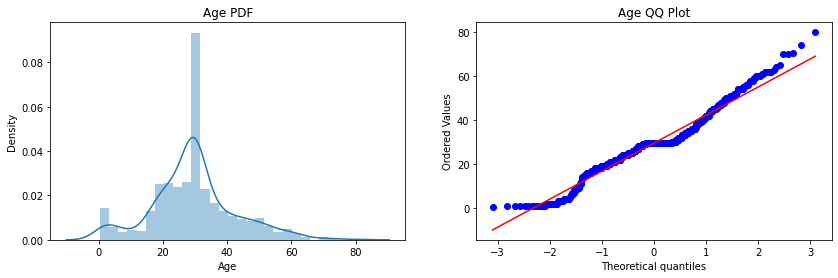

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


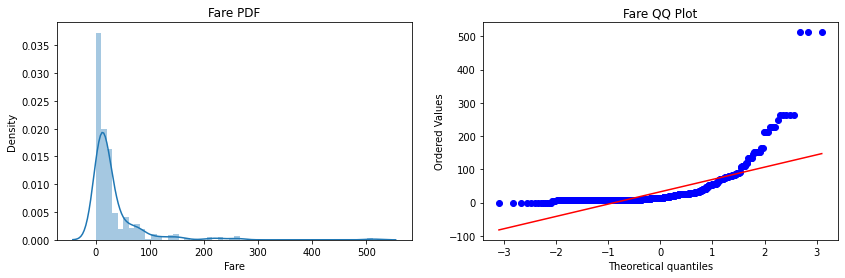

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.664804469273743


In [ ]:
trf = FunctionTransformer(func=np.log1p)

In [ ]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6759776536312849


In [ ]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6611111111111112


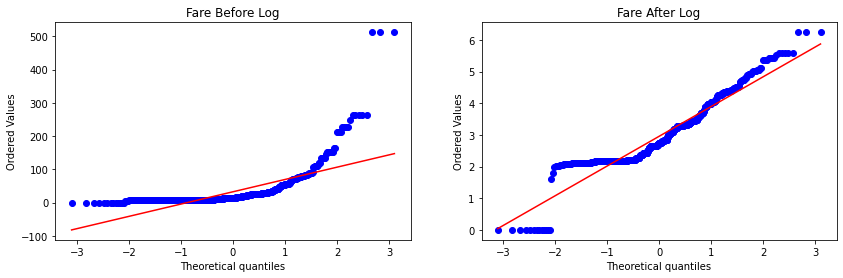

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

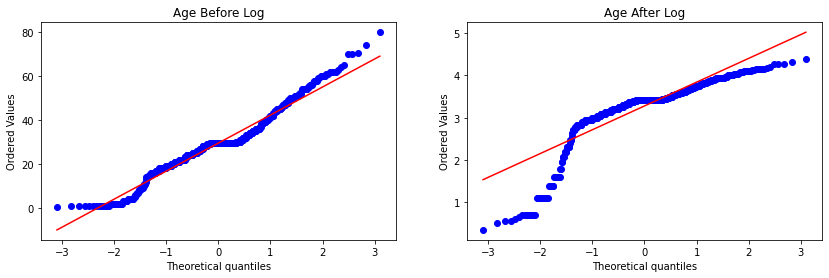

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [ ]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6536312849162011


In [ ]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6622097378277153


In [ ]:
def apply_transform(transform):
    X = t1.iloc[:,1:3]
    y = t1.iloc[:,0]

    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')

    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()

    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()


Accuracy 0.6195131086142323


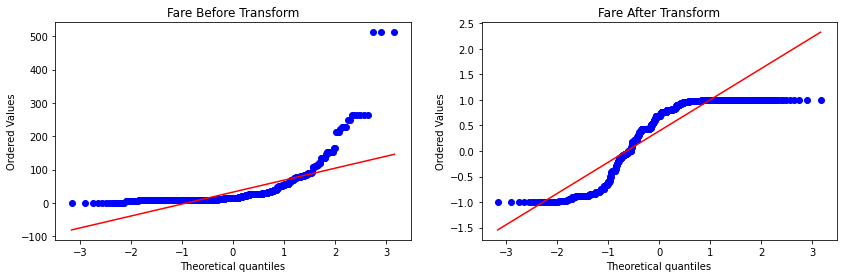

In [ ]:
apply_transform(np.sin)

# Power Transformer

In [ ]:
t2 = pd.read_csv('/content/concrete.csv')

In [ ]:
t2.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
t2.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [ ]:
x = t2.iloc[:,:8]
y = t2.iloc[:,-1]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42,test_size = 0.2)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


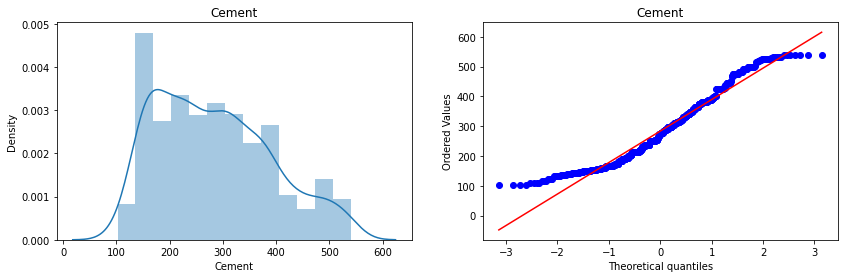

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


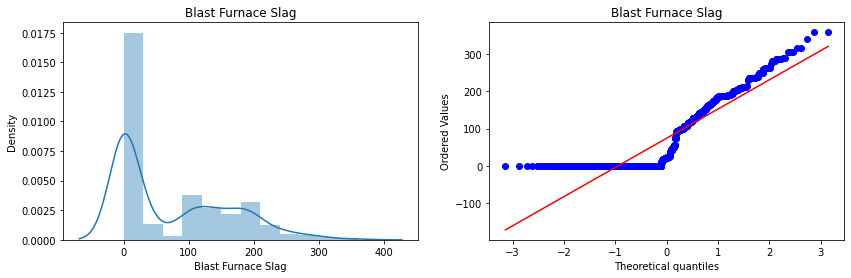

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


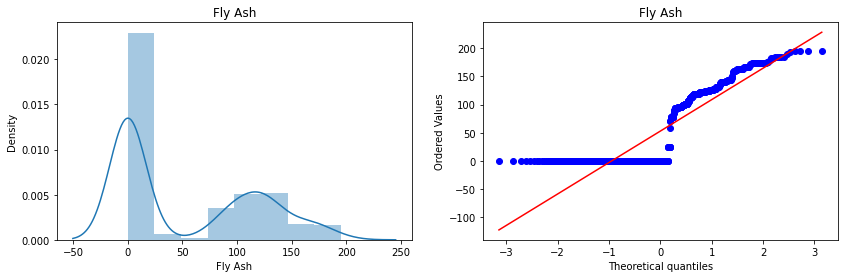

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


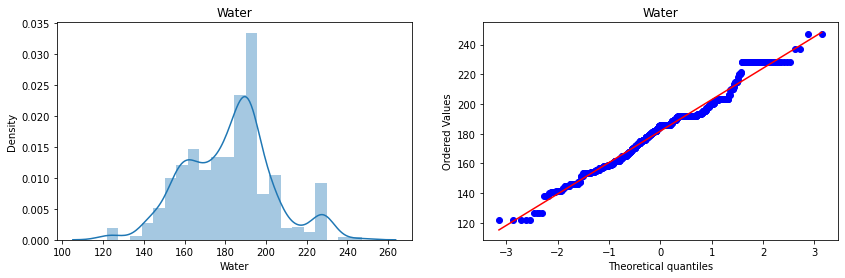

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


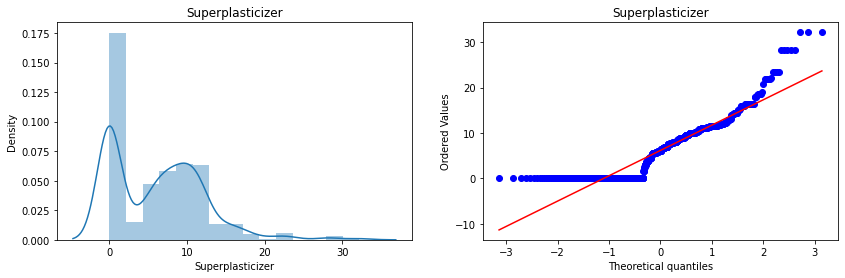

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


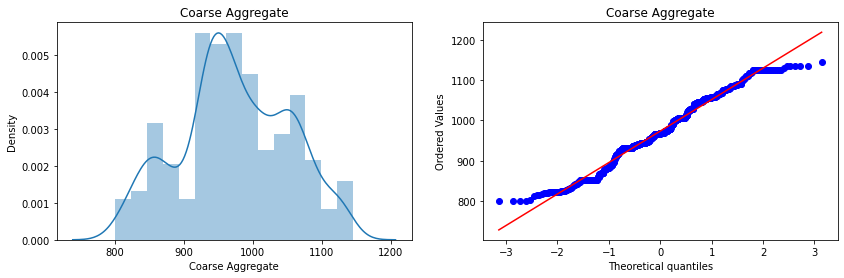

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


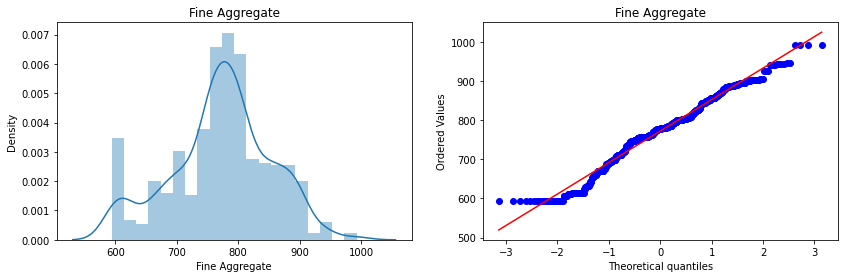

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


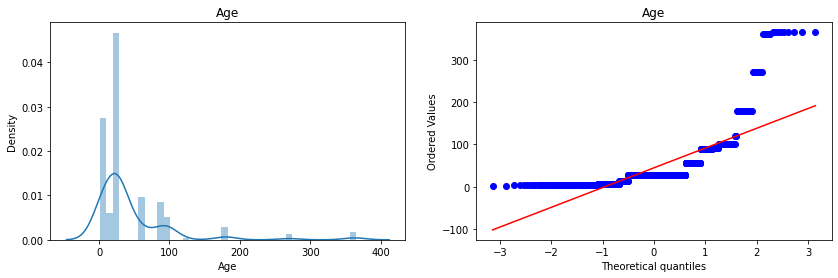

In [ ]:
for col in x_train.columns:
  plt.figure(figsize = (14,4))
  plt.subplot(121)
  sns.distplot(x_train[col])
  plt.title(col)

  plt.subplot(122)
  stats.probplot(x_train[col],dist='norm',plot=plt)
  plt.title(col)

  plt.show()

**Box-Cox**

In [ ]:
pt = PowerTransformer(method='box-cox')

x_train_transformed = pt.fit_transform(x_train+0.000001)
x_test_transformed = pt.transform(x_test+0.000001)

In [ ]:
lr = LinearRegression()

lr.fit(x_train,y_train)
ypred1 = lr.predict(x_test)
r2_score(y_test, ypred1)

0.6275531792314853

In [ ]:
lrtransformed = LinearRegression()

lrtransformed.fit(x_train_transformed,y_train)
ypred2 = lrtransformed.predict(x_test_transformed)
r2_score(y_test, ypred2)

0.8047825006181188

In [ ]:
a = pd.DataFrame(x_train_transformed,columns = x_train.columns)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


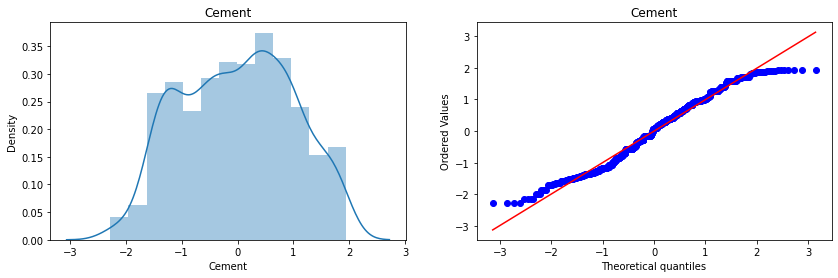

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


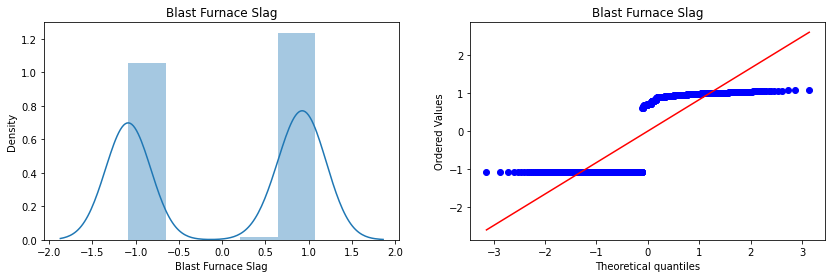

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


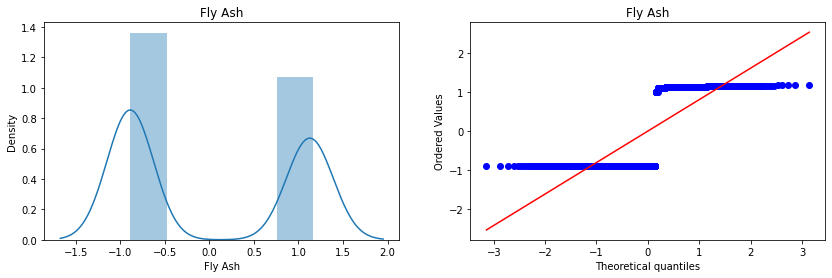

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


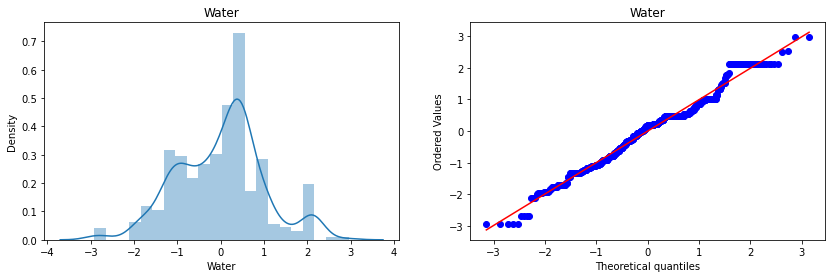

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


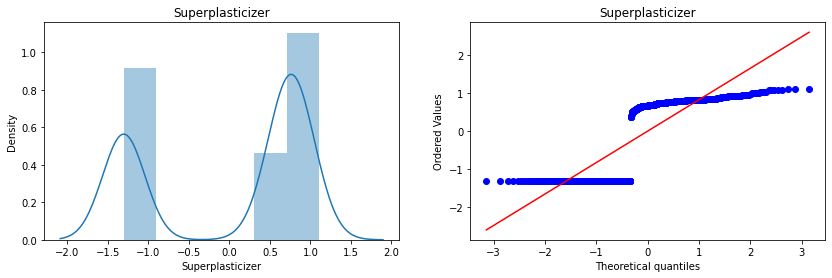

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


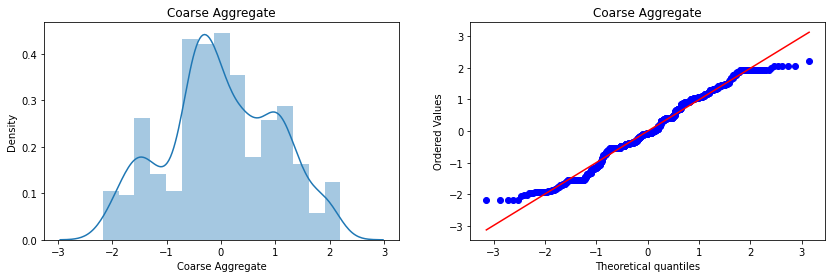

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


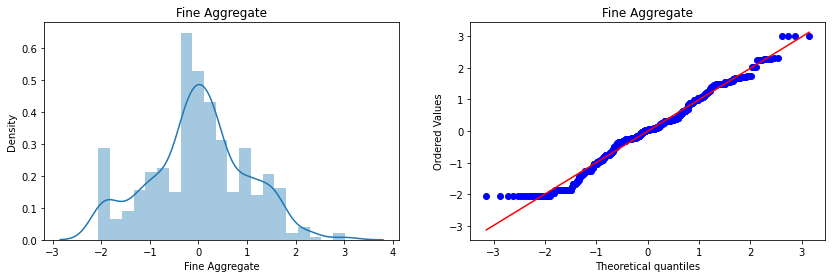

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


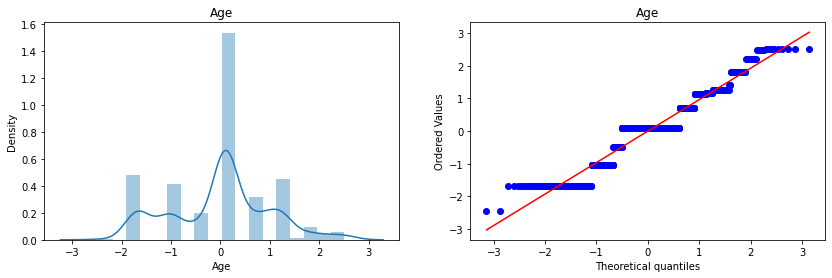

In [ ]:
for col in a.columns:
  plt.figure(figsize = (14,4))
  plt.subplot(121)
  sns.distplot(a[col])
  plt.title(col)

  plt.subplot(122)
  stats.probplot(a[col],dist='norm',plot=plt)
  plt.title(col)

  plt.show()

**Yeo-Johnson**

In [ ]:
pt1 = PowerTransformer()

x_train_transform2 = pt1.fit_transform(x_train)
x_test_transform2 = pt1.transform(x_test)

In [ ]:
lr2 = LinearRegression()

lr2.fit(x_train_transform2,y_train)
y_pred2 = lr2.predict(x_test_transform2)
r2_score(y_test,y_pred2)

0.8161906512004999

In [ ]:
b = pd.DataFrame(x_train_transform2,columns = x_train.columns)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


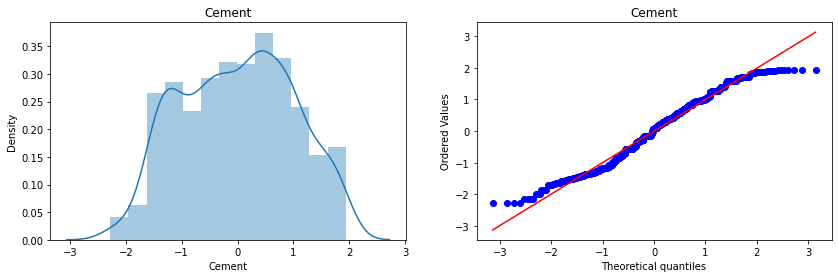

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


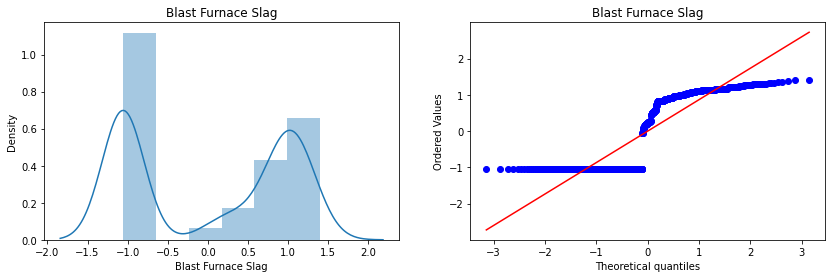

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


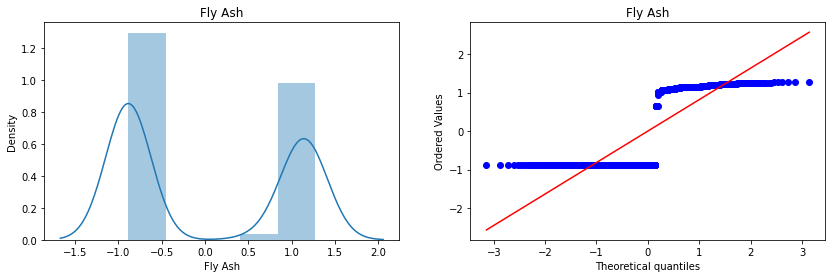

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


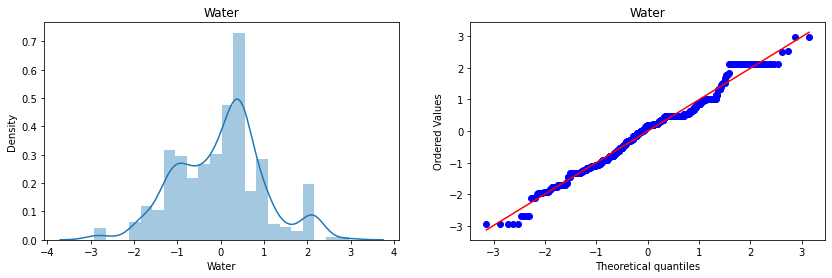

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


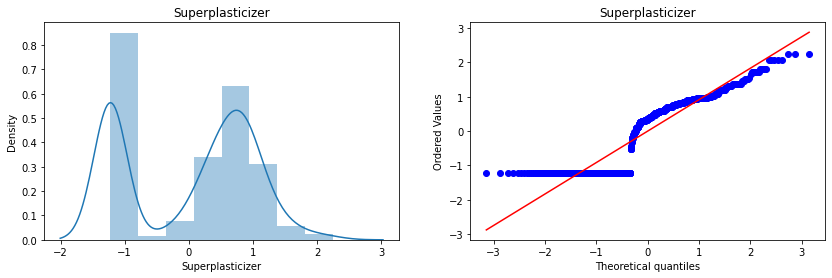

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


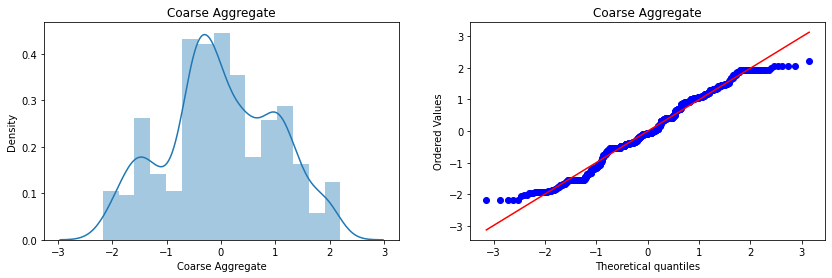

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


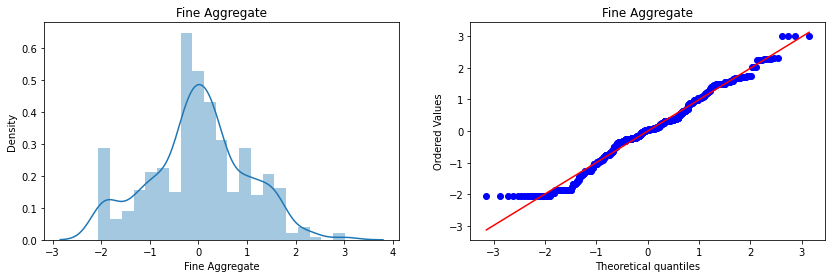

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


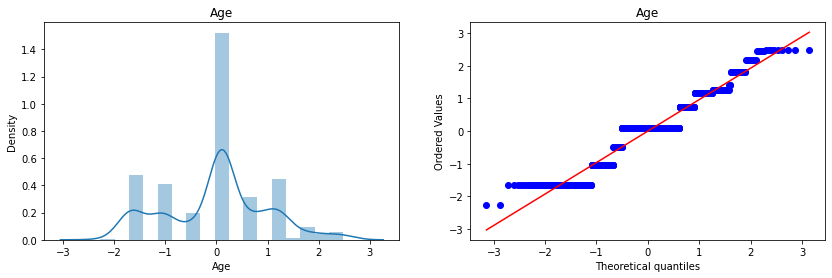

In [ ]:
for col in b.columns:
  plt.figure(figsize = (14,4))
  plt.subplot(121)
  sns.distplot(b[col])
  plt.title(col)

  plt.subplot(122)
  stats.probplot(b[col],dist='norm',plot=plt)
  plt.title(col)

  plt.show()

# Encoding Numerical Features

# Binning (Discretization)

1. Unsupervized
* Equal Width
* Equal frequency
* KMeans
2. Supervised
* Decision Tree binning
3. custom

In [ ]:
t3 = pd.read_csv('/content/titanic.csv', usecols=['Age', 'Fare','Survived'])

In [ ]:
t3.dropna(inplace = True)

In [ ]:
t3.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
x = t3.iloc[:,1:3]
y = t3.iloc[:,0]

x_train,x_test ,y_train,y_test = train_test_split(x,y,random_state = 42,test_size = 0.2)
x_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [ ]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_pred,y_test)

0.6223776223776224

In [ ]:
kbinage = KBinsDiscretizer(n_bins = 5, encode = 'ordinal',strategy = 'kmeans')
kbinfare = KBinsDiscretizer(n_bins = 5, encode = 'ordinal',strategy = 'kmeans')

In [ ]:
trf = ColumnTransformer([
    ('age',kbinage,[0]),
    ('fare',kbinfare,[1])
])

In [ ]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

In [ ]:
clf1 = DecisionTreeClassifier()
clf1.fit(x_train_trf,y_train)
y_pred1 = clf.predict(x_test_trf)
accuracy_score(y_test,y_pred1)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.44755244755244755

# Binarizer

Threshold,

# Mixed Data

In [ ]:
mix = pd.read_csv('/content/mixdata.csv')
mix.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [ ]:
mix['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

In [ ]:
mix['number_numerical'] = pd.to_numeric(mix['number'],errors='coerce',downcast='integer')
mix['number_alphabets'] = np.where(mix['number_numerical'].isnull(),mix['number'],np.nan)
mix.head()

,Cabin,Ticket,number,Survived,number_numerical,number_alphabets
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [ ]:
mix['cabin_num'] = mix['Cabin'].str.extract('(\d+)') # captures numerical part
mix['cabin_cat'] = mix['Cabin'].str[0] # captures the first letter

mix.head()

,Cabin,Ticket,number,Survived,number_numerical,number_alphabets,cabin_num,cabin_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN


In [ ]:
mix['ticket_num'] = mix['Ticket'].apply(lambda s: s.split()[-1])
mix['ticket_num'] = pd.to_numeric(mix['ticket_num'],errors='coerce',downcast='integer')

# extract the first part of ticket as category
mix['ticket_cat'] = mix['Ticket'].apply(lambda s: s.split()[0])
mix['ticket_cat'] = np.where(mix['ticket_cat'].str.isdigit(), np.nan,
                              mix['ticket_cat'])

mix.head(20)

,Cabin,Ticket,number,Survived,number_numerical,number_alphabets,cabin_num,cabin_cat,ticket_num,ticket_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,NaN,123,C,113803.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,NaN
5,NaN,330877,2,0,2.0,NaN,NaN,NaN,330877.0,NaN
6,E46,17463,2,0,2.0,NaN,46,E,17463.0,NaN
7,NaN,349909,5,0,5.0,NaN,NaN,NaN,349909.0,NaN
8,NaN,347742,1,1,1.0,NaN,NaN,NaN,347742.0,NaN
9,NaN,237736,A,1,NaN,A,NaN,NaN,237736.0,NaN


# Handling Date and Time

In [ ]:
date = pd.read_csv('/content/date.csv')
time = pd.read_csv('/content/time.csv')

In [ ]:
date['date'] = pd.to_datetime(date['date'])

In [ ]:
date.head()

,date,product_id,city_id,orders
0,2019-12-10,5628,25,3
1,2018-08-15,3646,14,157
2,2018-10-23,1859,25,1
3,2019-08-17,7292,25,1
4,2019-01-06,4344,25,3


Extract year

In [ ]:
date['year'] = date['date'].dt.year
date['month'] = date['date'].dt.month
date['day'] = date['date'].dt.day
date['date_month_name'] = date['date'].dt.month_name()
date['date_day'] = date['date'].dt.day
date['date_dow'] = date['date'].dt.dayofweek
date['date_dow_name'] = date['date'].dt.day_name()
date['date_is_weekend'] = np.where(date['date_dow_name'].isin(['Sunday', 'Saturday']), 1,0)
date['date_week'] = date['date'].dt.week
date['quarter'] = date['date'].dt.quarter
date['semester'] = np.where(date['quarter'].isin([1,2]), 1, 2)

date.head(2)

<ipython-input-113-c949df330b99>:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  date['date_week'] = date['date'].dt.week


,date,product_id,city_id,orders,year,month,day,date_month_name,date_day,date_dow,date_dow_name,date_is_weekend,date_week,quarter,semester
0,2019-12-10,5628,25,3,2019,12,10,December,10,1,Tuesday,0,50,4,2
1,2018-08-15,3646,14,157,2018,8,15,August,15,2,Wednesday,0,33,3,2


In [ ]:
import datetime

today = datetime.datetime.today()

today

datetime.datetime(2023, 2, 26, 16, 28, 50, 385126)

In [ ]:
today - date['date']

0     1174 days 16:28:50.385126
1     1656 days 16:28:50.385126
2     1587 days 16:28:50.385126
3     1289 days 16:28:50.385126
4     1512 days 16:28:50.385126
                 ...           
995   1602 days 16:28:50.385126
996   1543 days 16:28:50.385126
997   1391 days 16:28:50.385126
998   1456 days 16:28:50.385126
999   1230 days 16:28:50.385126
Name: date, Length: 1000, dtype: timedelta64[ns]

In [ ]:
(today - date['date']).dt.days

0      1174
1      1656
2      1587
3      1289
4      1512
       ... 
995    1602
996    1543
997    1391
998    1456
999    1230
Name: date, Length: 1000, dtype: int64

In [ ]:
np.round((today -date['date']) / np.timedelta64(1, 'M'),0)

0      39.0
1      54.0
2      52.0
3      42.0
4      50.0
       ... 
995    53.0
996    51.0
997    46.0
998    48.0
999    40.0
Name: date, Length: 1000, dtype: float64

In [ ]:
time.head()

,date,msg
0,2013-12-15 00:50:00,ищу на сегодня мужика 37
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше


In [ ]:
time['date'] = pd.to_datetime(time['date'])

In [ ]:
time['hour'] = time['date'].dt.hour
time['min'] = time['date'].dt.minute
time['sec'] = time['date'].dt.second

time.head()

,date,msg,hour,min,sec
0,2013-12-15 00:50:00,ищу на сегодня мужика 37,0,50,0
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826,23,40,0
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576,0,21,0
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...,0,31,0
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше,23,11,0


In [ ]:
time['time'] = time['date'].dt.time

time.head()

,date,msg,hour,min,sec,time
0,2013-12-15 00:50:00,ищу на сегодня мужика 37,0,50,0,00:50:00
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826,23,40,0,23:40:00
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576,0,21,0,00:21:00
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...,0,31,0,00:31:00
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше,23,11,0,23:11:00


In [ ]:
today - time['date']

0     3360 days 15:38:50.385126
1     3224 days 16:48:50.385126
2     3710 days 16:07:50.385126
3     3012 days 15:57:50.385126
4     3409 days 17:17:50.385126
                 ...           
995   3999 days 15:38:50.385126
996   3320 days 17:14:50.385126
997   3785 days 16:51:50.385126
998   3901 days 16:54:50.385126
999   3173 days 17:03:50.385126
Name: date, Length: 1000, dtype: timedelta64[ns]

In [ ]:
(today - time['date'])/np.timedelta64(1,'s')

0      2.903603e+08
1      2.786141e+08
2      3.206021e+08
3      2.602943e+08
4      2.945999e+08
           ...     
995    3.455699e+08
996    2.869101e+08
997    3.270847e+08
998    3.371073e+08
999    2.742086e+08
Name: date, Length: 1000, dtype: float64

# Handing Missing value

A) Remove columns

B) Impute

* Univariate

1. Numerical
* Mean
* Random
* End of Distribution value
2. Categorical
* Mode
* Missing

* Multivariate

In [ ]:
df = pd.read_csv('/content/datascienceapplications.csv')

In [ ]:
df.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0


In [ ]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [ ]:
df.shape

(19158, 13)

In [ ]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [ ]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [ ]:
new_df = df[cols].dropna()
df.shape,new_df.shape

((19158, 13), (17182, 5))

we are checking how much change is there in distribution after removing null values, it should be nearly same which means that missing data was missing at random

<AxesSubplot:>

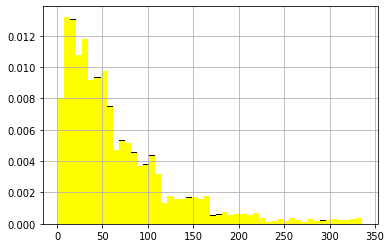

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['training_hours'].hist(bins=50,ax=ax,density=True,color='black')

new_df['training_hours'].hist(bins=50,ax=ax,density=True,color='yellow')

<AxesSubplot:ylabel='Density'>

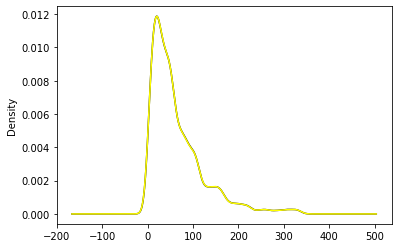

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['training_hours'].plot.density(color = 'black')

new_df['training_hours'].plot.density(color = 'yellow')

In [ ]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [ ]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


**Univariate imputation of numerical data**
* Mean/ Median
* Arbitary
* End of distribution
* Random

* If distribution is normal, use mean else median
* Not reliable for more than 5% of missing value

Disadvantages
* changes distribution
* creates outliers
* covariance

When to use:
* when data is missing at random
* when missing values < 5%

1. Mean/Median

In [ ]:
i1 = SimpleImputer(strategy = 'mean')
i2 = SimpleImputer(strategy = 'median')

trf = ColumnTransformer([
    ('imputer1',i1,['Age']),
    ('imputer2',i2,['Fare'])
],remainder = 'passthrough')

In [ ]:
trf.fit(X_train)

2. Arbitrary

Dsiadvantages -> same as previous

In [ ]:
i3 = SimpleImputer(strategy = 'constant',fill_value=99)
i4 = SimpleImputer(strategy = 'constant',ill_value=-1)

trf1 = ColumnTransformer([
    ('imputer1',i3,['Age']),
    ('imputer2',i4,['Fare'])
],remainder = 'passthrough')

trf1.fit(X_train)

Random Sample Imputation

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')

Random Imputation

Numerical data

In [ ]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

Categorical Data

In [ ]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

In [ ]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [ ]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

Missing Indicator

Create a new column that has true and false values to indicate whether a value in missing

In [ ]:
mi = MisiingIndicator()
mi.fit(x_train)
x_train_missing = mi.transform(x_train)

Grid Search CV

Automatically finds how to impute

**Multivariate Imputation**

KNN Imputer

In [ ]:
from sklearn.impute import KNNImputer

knn = KNNImputer(n_neighbors=3,weights='distance')

X_train_trf = knn.fit_transform(X_train)
X_test_trf = knn.transform(X_test)

Iterative Imputer - MICE

when data is Missing at random

# Outliers